MOCK-UP OF GROUP 2 SUPERVISED ML MODEL: Logistic REGRESSION

In [1]:
# Import dependencies
import pandas as pd 
from pathlib import Path 
import matplotlib.pyplot as plt 
from  sklearn.linear_model import  LinearRegression

In [2]:
# Load tornado data CSV as a Pandas DataFrame and preview the DataFrame
file_path = Path('../Cleaned_Data/2008-2020_tornadoes_EF_cleaned.csv')
df = pd.read_csv(file_path, index_col=0)
df.head(25)

,Year,Month,Day,Timestamp,State,Start_Lat,Start_Lon,End_Lat,End_Lon,EF,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
surr_key,,,,,,,,,,,,,,,,
51193,2008,10,11,2008-10-11 18:33:00,NM,35.15,-105.94,0.00,0.00,0,0,0,12000.0,NaN,0.02,10
51194,2008,10,11,2008-10-11 21:54:00,KS,39.33,-101.55,0.00,0.00,0,0,0,NaN,NaN,0.25,10
51195,2008,10,24,2008-10-24 16:55:00,GA,31.02,-81.81,0.00,0.00,0,0,0,1000.0,NaN,0.25,25
51196,2008,10,6,2008-10-06 13:46:00,AR,34.58,-94.15,34.63,-94.12,1,0,0,75000.0,NaN,3.41,250
51197,2008,10,6,2008-10-06 16:05:00,TX,33.07,-94.10,33.09,-94.08,0,0,0,75000.0,NaN,1.50,100
51198,2008,10,6,2008-10-06 19:29:00,TX,31.85,-95.87,31.88,-95.73,0,0,0,55000.0,NaN,6.95,50
51199,2008,10,6,2008-10-06 21:10:00,TX,32.14,-95.31,32.14,-95.31,0,0,0,NaN,NaN,0.50,50
51200,2008,10,7,2008-10-07 18:55:00,MS,34.23,-89.02,34.23,-89.02,1,0,0,15000.0,NaN,0.05,30
51201,2008,10,8,2008-10-08 04:30:00,AL,33.95,-87.58,33.96,-87.57,0,0,0,15000.0,NaN,0.48,40


In [3]:
# Review columns
df.columns

Index(['Year', 'Month', 'Day', 'Timestamp', 'State', 'Start_Lat', 'Start_Lon',
       'End_Lat', 'End_Lon', 'EF', 'Injuries', 'Fatalities', 'Loss',
       'Crop_Loss', 'Length', 'Width'],
      dtype='object')

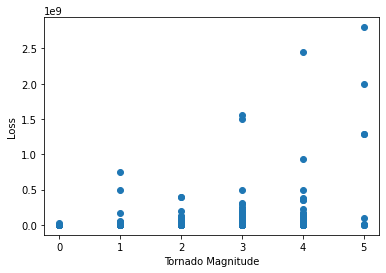

In [4]:
# Visually inspect relationship between tornado magnitude ('EF' column) and 'Loss' - positive trend
plt.scatter(df.EF, df.Loss) 
plt.xlabel('Tornado Magnitude') 
plt.ylabel('Loss') 
plt.show()

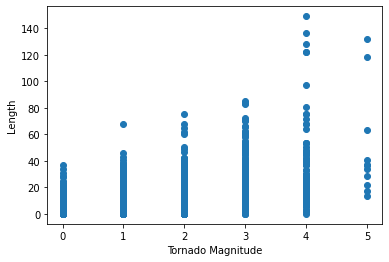

In [5]:
# Visually inspect relationship between tornado magnitude ('EF' column) and 'Length' - positive trend
plt.scatter(df.EF, df.Length) 
plt.xlabel('Tornado Magnitude') 
plt.ylabel('Length') 
plt.show()

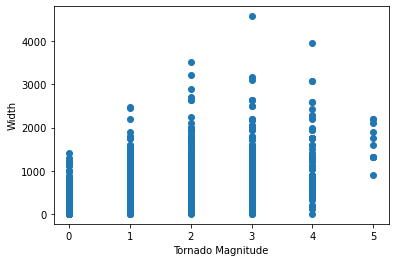

In [6]:
# Visually inspect relationship between tornado magnitude ('EF' column) and 'Width' - positive trend
plt.scatter(df.EF, df.Width) 
plt.xlabel('Tornado Magnitude') 
plt.ylabel('Width') 
plt.show()

In [7]:
# Format data to meet the requirements of the Scikit-learn library: 
# Will add Loss later
feature_names = ["Length", "Width"]
X = df[feature_names]


In [8]:
# Assign the target variable - EF
y = df.EF.values.reshape(-1, 1)
y

array([[0],
       [0],
       [0],
       ...,
       [2],
       [1],
       [0]], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
## Logistic Regression

# Our data is not linear - Reject model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

print('Accuracy of logistic regression on training', logreg.score(X_train_scaled, y_train))
print('Accuracy of logistic regression on testing', logreg.score(X_test_scaled, y_test))

C:\Users\austi\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of logistic regression on training 0.6436482631313979
Accuracy of logistic regression on testing 0.6388119808708784
